### XOR neural network with keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


X_len = 10_000
raw_data = []

# Generate a lot of training data
for _ in range(X_len // 4):
    raw_data.append([0,0, 0])
    raw_data.append([0,1, 1])
    raw_data.append([1,0, 1])
    raw_data.append([1,1, 0])


X = np.array(raw_data)[:, :2]
y = np.array(raw_data)[:, 2].reshape((X_len, 1,))
print("X =", X.shape, "y =", y.shape)

X = (10000, 2) y = (10000, 1)


In [2]:
print(X[0], y[0])
print(X[1], y[1])
print(X[2], y[2])
print(X[3], y[3])

[0 0] [0]
[0 1] [1]
[1 0] [1]
[1 1] [0]


### Building the model

In [3]:
def init_model():
    return keras.Sequential([
        layers.Input(shape=(X.shape[1],)),
        layers.Dense(4, activation="sigmoid"),
        layers.Dense(4, activation="sigmoid"),
        layers.Dense(1, activation="sigmoid")
    ])


model = init_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


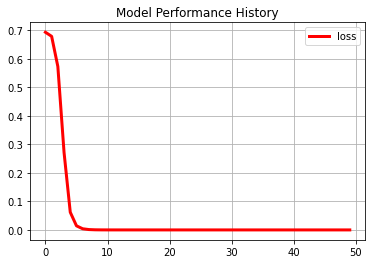

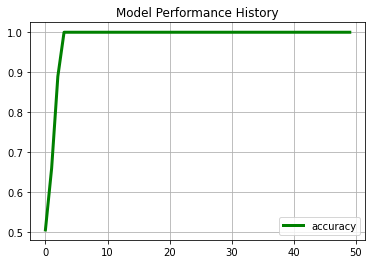

In [4]:
model = init_model()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, batch_size=4, epochs=50, validation_split=0.1, verbose=False)

# Plot history
plt.grid()
plt.title("Model Performance History")
plt.plot(history.history['loss'], c="r", linewidth=3)
plt.legend(["loss"])
plt.show()

plt.grid()
plt.title("Model Performance History")
plt.plot(history.history['accuracy'], c="g", linewidth=3)
plt.legend(["accuracy"])
plt.show()

### Tests


In [5]:
input = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
output_must_be = np.array([[0., 1., 1., 0.]]).T

o = model.predict(input)
print(o)
print()
print("Predicted:")
print(np.round(o, 2))
print()
print("Output must be:")
print(output_must_be)
print()

[[1.1641799e-09]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.5846142e-10]]

Predicted:
[[0.]
 [1.]
 [1.]
 [0.]]

Output must be:
[[0.]
 [1.]
 [1.]
 [0.]]



### Conclusions

With less than 7 epochs, it is possible for a specific neural network to learn the XOR function.